In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import platform

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [4]:
data = pd.read_csv('data/supermarket.csv')

# 데이터 정보 확인

In [5]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
data.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

# 데이터 전처리

In [9]:
# Branch 와 City 그 종류 개수가 같으므로 가 도시당 지점이  한개 뿐이라 판단. 즉 굳이 두 칼럼 모두는 필요없음.   -> Branch 칼럼제외
# Tax 5%, Total 은 둘다 Unit price와 Quantity에 종속된 값이지만 Total은 편의성을 위해 살려놓겠음.               -> Tax 5% 칼럼제외
# gross margin percentage의 종류 개수는 1개이므로 필요없는 데이터라 판단.                                       -> gross margin percentage 칼럼제외
# cogs, gross income 은 Total과 gross margin percentag에 종속된 값인데 gross margin percentag가 고정이므로 삭제 -> cogs, gross income 칼럼제외

cdt = data.drop(['Branch','Tax 5%','gross margin percentage','cogs','gross income'], axis=1)
cdt.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,5.3


In [10]:
# City, Customer type, Gender, Product line, Payment 칼럼들의 형식을 카테고리형으로 바꿔봄.
# Date ,time 형식을 datetime형으로 바꿈. ###Date에서 년도 없애고, Time에서 년월일,초 지우고 싶다. 근데 그럼 str로 바뀌는데..
# 요일 항목을 추가

cdt[['City','Customer type','Gender','Product line','Payment']] = cdt[['City','Customer type','Gender','Product line','Payment']].astype('category')
cdt['Date'] = (cdt['Date']).astype('datetime64')   
cdt['Time'] = pd.to_datetime(cdt['Time'])
cdt['Weekday'] = cdt['Date'].dt.weekday             

In [11]:
cdt

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating,Weekday
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,2022-10-21 13:08:00,Ewallet,9.1,5
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,2022-10-21 10:29:00,Cash,9.6,4
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,2022-10-21 13:23:00,Credit card,7.4,6
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2019-01-27,2022-10-21 20:33:00,Ewallet,8.4,6
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,2022-10-21 10:37:00,Ewallet,5.3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,42.3675,2019-01-29,2022-10-21 13:46:00,Ewallet,6.2,1
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,1022.4900,2019-03-02,2022-10-21 17:16:00,Ewallet,4.4,5
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,33.4320,2019-02-09,2022-10-21 13:22:00,Cash,7.7,5
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,69.1110,2019-02-22,2022-10-21 15:33:00,Cash,4.1,4


In [12]:
cdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   City           1000 non-null   category      
 2   Customer type  1000 non-null   category      
 3   Gender         1000 non-null   category      
 4   Product line   1000 non-null   category      
 5   Unit price     1000 non-null   float64       
 6   Quantity       1000 non-null   int64         
 7   Total          1000 non-null   float64       
 8   Date           1000 non-null   datetime64[ns]
 9   Time           1000 non-null   datetime64[ns]
 10  Payment        1000 non-null   category      
 11  Rating         1000 non-null   float64       
 12  Weekday        1000 non-null   int64         
dtypes: category(5), datetime64[ns](2), float64(3), int64(2), object(1)
memory usage: 68.2+ KB


# 데이터 시각화 및 분석

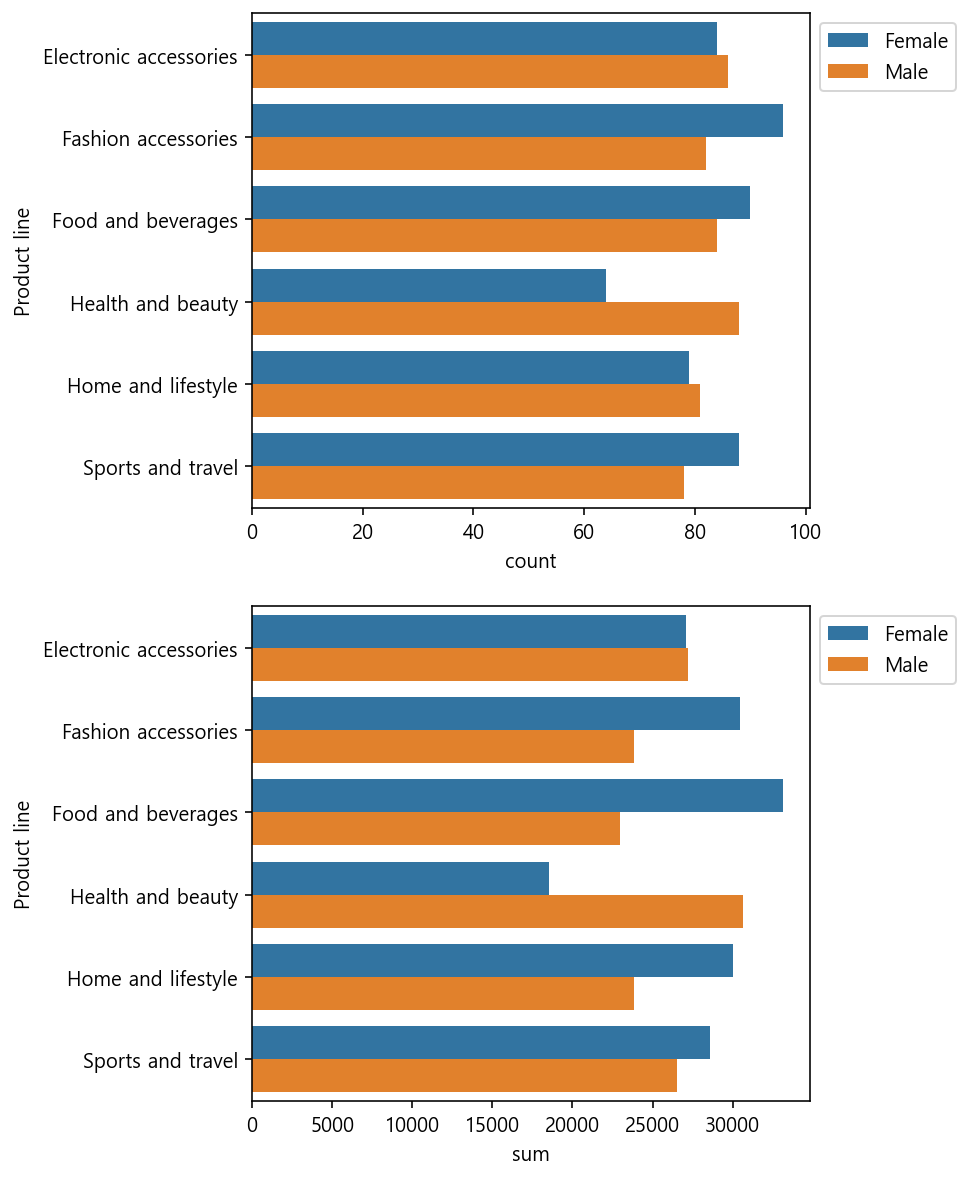

In [13]:
# 품목 카테고리에 대한 성별 구매건수, 총구매금액
fig = plt.figure(figsize=(5,10))

axes1 = fig.add_subplot(2,1,1)
axes2 = fig.add_subplot(2,1,2)

sns.barplot(data=cdt.groupby(['Gender','Product line'], as_index = False).agg(count = ('Total', 'count'))\
    , y='Product line',x='count', hue='Gender', ax=axes1).legend(loc = 2, bbox_to_anchor = (1,1))
sns.barplot(data=cdt.groupby(['Gender','Product line'], as_index = False).agg(sum = ('Total', 'sum'))\
    , y='Product line',x='sum', hue='Gender', ax=axes2).legend(loc = 2, bbox_to_anchor = (1,1))

# 다른 품목들은 통상적으로 생각되는 추세를 따르고 있지만, 여성의 구매건수와 총매출이 높을 것으로 유추되는 건강미용용품 라인의 통계를 보니 그와 반대의 결과가 나왔다.
# 이는 슈퍼마켓이다 보니 백화점등에 비해 여성이 주타겟인 미용용품의 구성이 별로라 그렇다고 생각된다. 라인업 구성에 신경써야 한다.

Text(0.5, 1.0, '도시별 평균구매금액(품목별)')

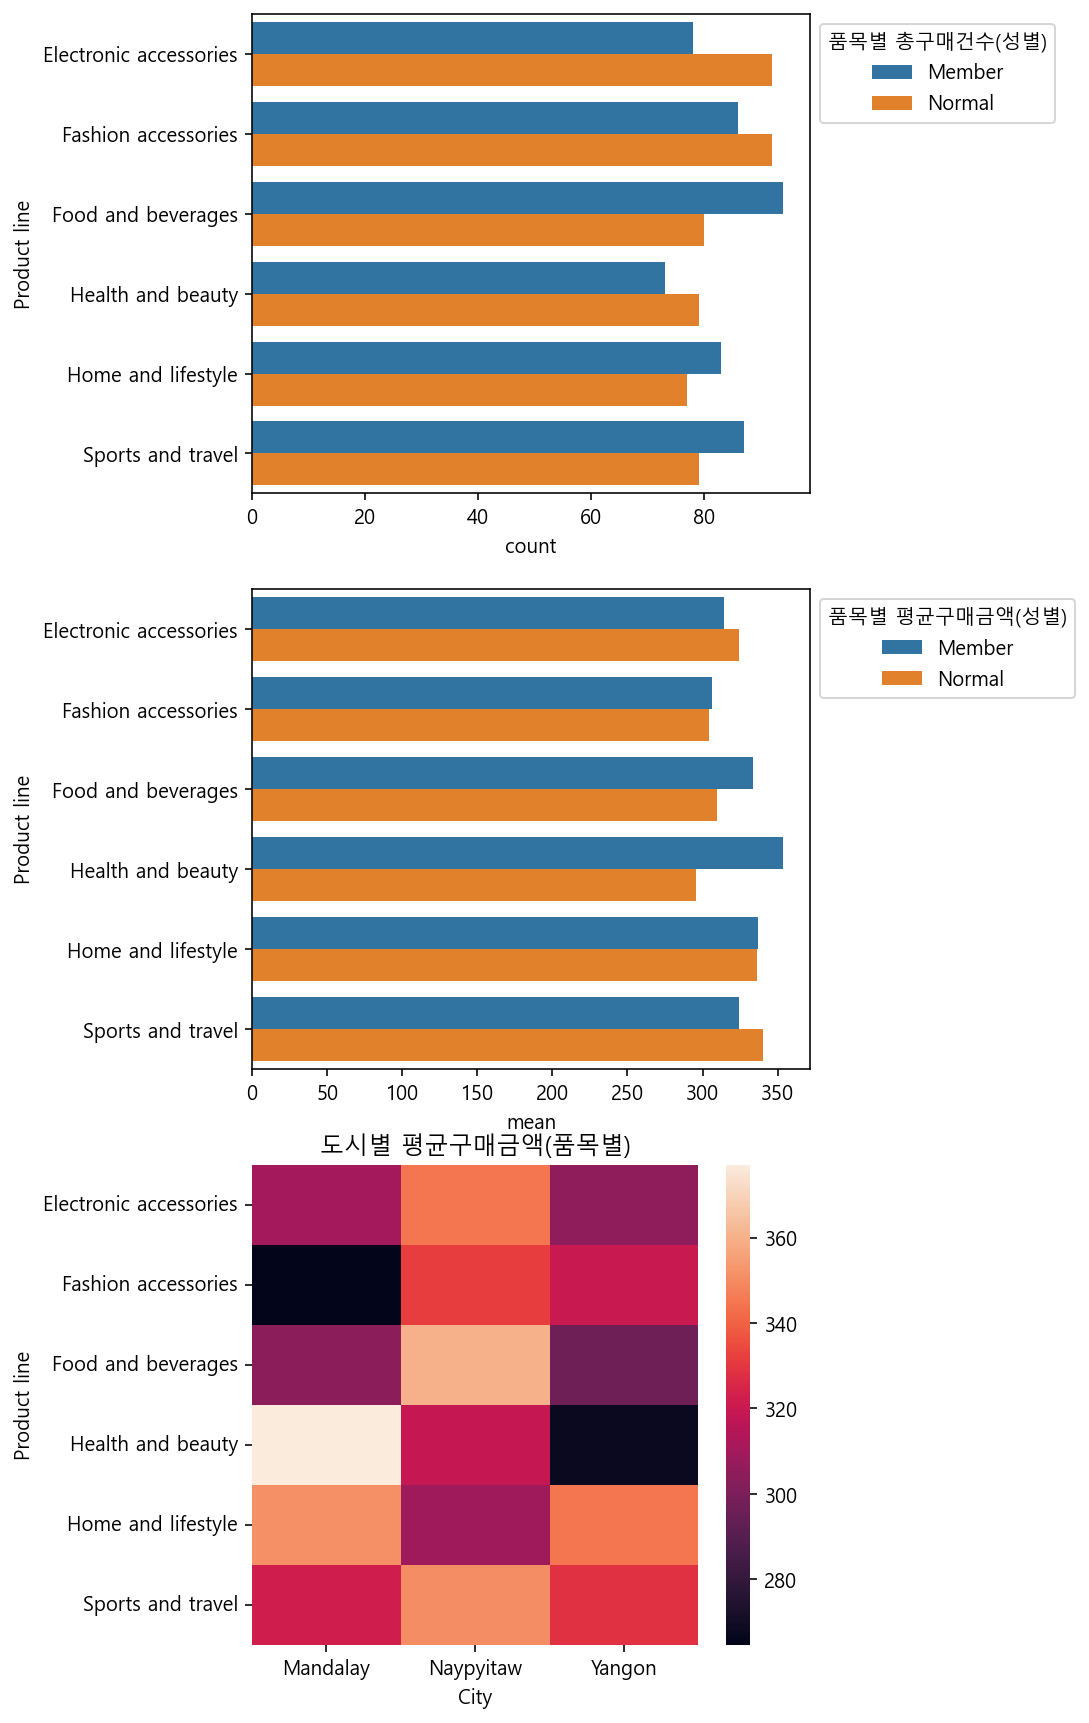

In [14]:
# 품목 카테고리에 대한 Customer type별 구매건수, 평균구매금액
fig = plt.figure(figsize=(5,15))

axes1 = fig.add_subplot(3,1,1)
axes2 = fig.add_subplot(3,1,2)
axes3 = fig.add_subplot(3,1,3)

sns.barplot(data=cdt.groupby(['Customer type','Product line'], as_index = False).agg(count = ('Total', 'count'))\
    , y='Product line',x='count', hue='Customer type', ax=axes1)\
    .legend(loc = 2, bbox_to_anchor = (1,1)).set_title('품목별 총구매건수(성별)')
sns.barplot(data=cdt.groupby(['Customer type','Product line'], as_index = False).agg(mean = ('Total', 'mean'))\
    , y='Product line',x='mean', hue='Customer type', ax=axes2)\
    .legend(loc = 2, bbox_to_anchor = (1,1)).set_title('품목별 평균구매금액(성별)')
# 전자기기는 비멤버들의 구매수가 멤버들의 구매수보다 상당량 많다. 기성제품이 대다수인점에서 충성도보다는 저렴한 가격 또는 긴 보증기간 등이 비멤버들을 유혹하는 요인이지 않을까 싶다. 
# 그에 반해 식음료는 신뢰도가 중요하므로 충성도가 높은 멤버들의 구매수가 더 많음을 보여준다. 전자기기로 비회원들을 유혹해 식음료를 사게 만드는 공간 배치와 프로모션을 진행하자. 
# 건강미용용품은 멤버들의 구매수가 적음에도 평균구매금액은 상당히 높다. 위에서 살펴보았듯 건강미용용품 판매의 다수를 남성이 차지하고 있음을 볼때,
# 남성멤버들의 건강용품에 대한 충성도가 높고 이는 슈퍼마트와 운동시설이 밀접한 관계 내에 있지 않을까 싶다. 

sns.heatmap(cdt.pivot_table( index= 'Product line', columns='City', values= 'Total', aggfunc='mean'), ax=axes3).set_title('도시별 평균구매금액(품목별)')
# Mandalay시의 남성들이 건강에 관심이 많은듯 하다.

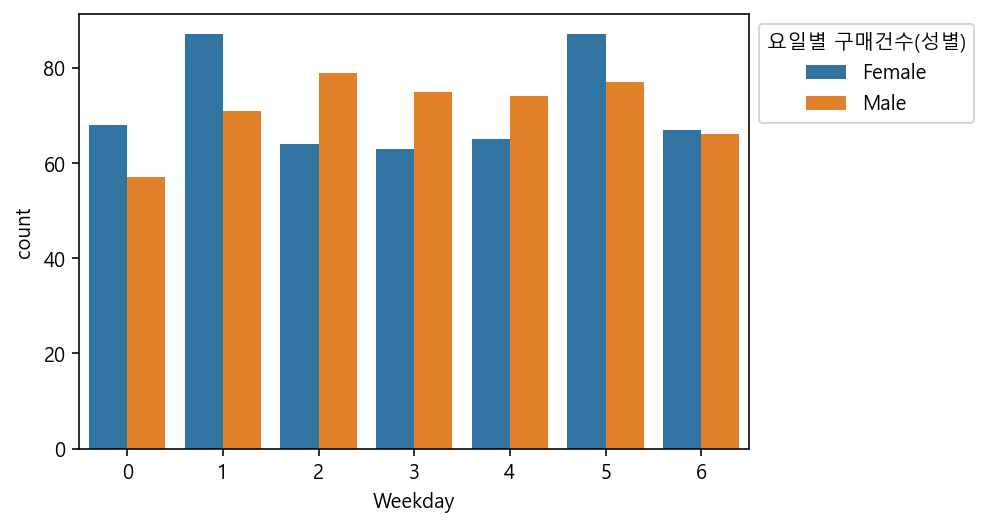

In [15]:
# 요일별 구매건수(성별)
sns.countplot(data=cdt, x='Weekday', hue='Gender').legend(loc = 2, bbox_to_anchor = (1,1)).set_title('요일별 구매건수(성별)')
# 일요일,월요일이 대체적으로 비수기
# 남성은 일,월을 제외하곤 대체로 평이하지만, 여성의 경우 화요일, 토요일에 수요가 집중되므로 그에 맞춘 프로모션을 진행하면 좋을 것 같다.
 

Text(0.5, 1.0, '요일별 평균평점(도시별)')

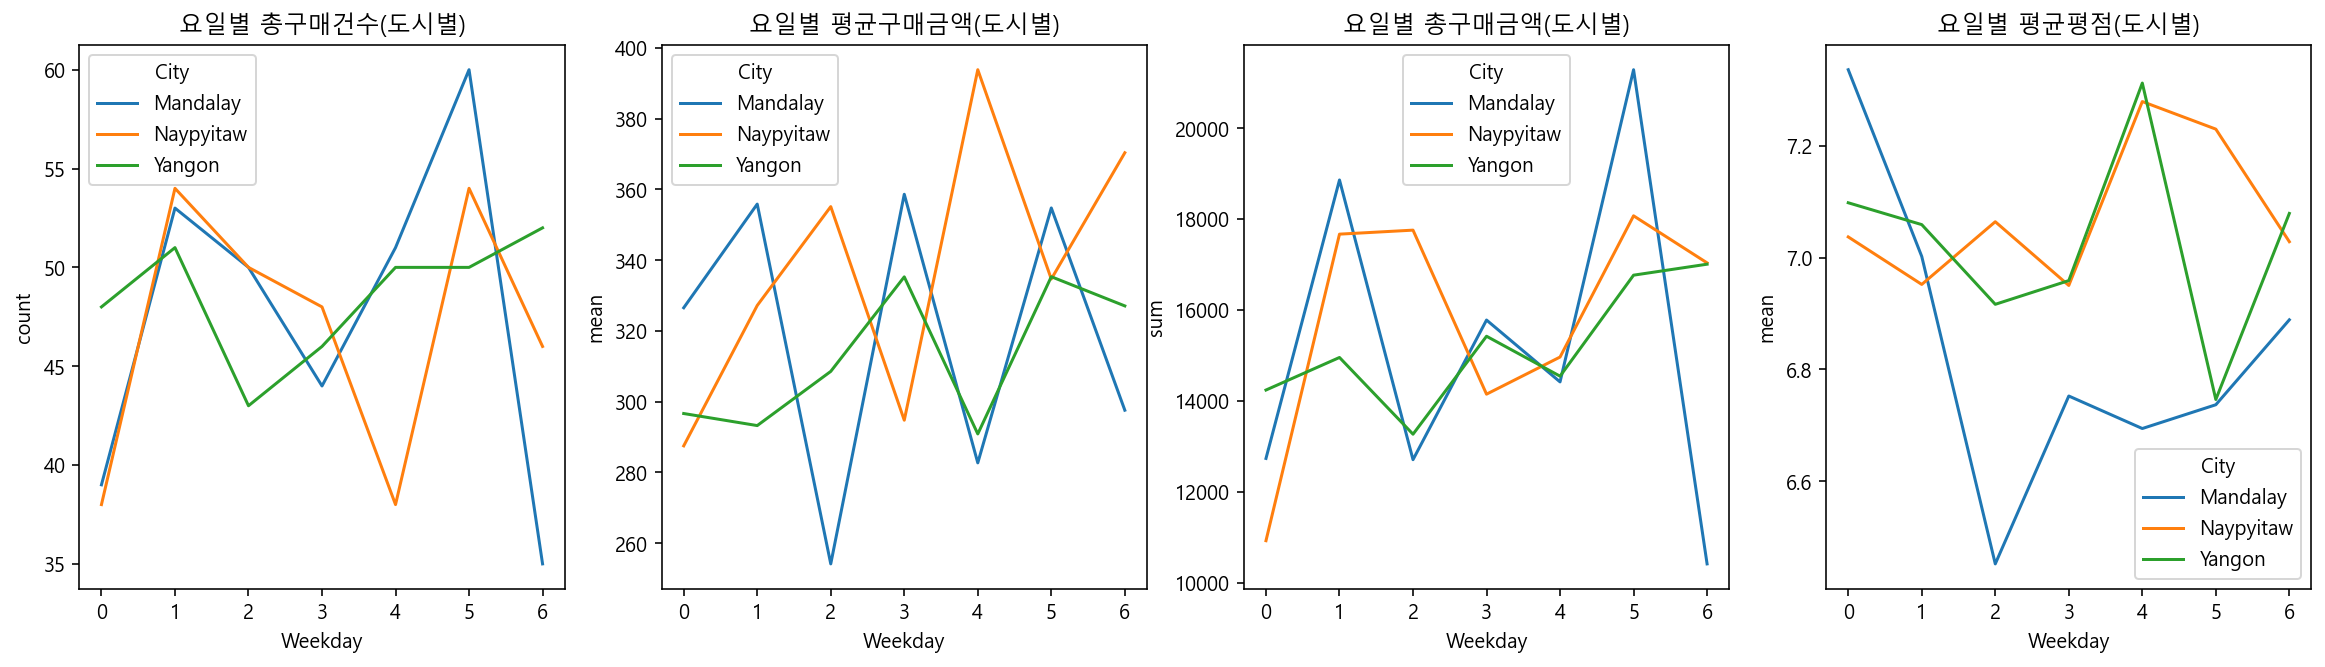

In [16]:
# 요일별 총구매건수, 평균구매금액, 총구매금액 (hue=지점)
fig = plt.figure(figsize=(20,5))

axes1 = fig.add_subplot(1,4,1)
axes2 = fig.add_subplot(1,4,2)
axes3 = fig.add_subplot(1,4,3)
axes4 = fig.add_subplot(1,4,4)

sns.lineplot(data=cdt.groupby(['Weekday','City'], as_index = False).agg(count = ('Total', 'count'))\
    , x= 'Weekday',y='count',hue='City', ax=axes1).set_title('요일별 총구매건수(도시별)')
sns.lineplot(data=cdt.groupby(['Weekday','City'], as_index = False).agg(mean = ('Total', 'mean'))\
    , x= 'Weekday',y='mean',hue='City', ax=axes2).set_title('요일별 평균구매금액(도시별)')
sns.lineplot(data=cdt.groupby(['Weekday','City'], as_index = False).agg(sum = ('Total', 'sum'))\
    , x= 'Weekday',y='sum',hue='City', ax=axes3).set_title('요일별 총구매금액(도시별)')

# Mandalay지점의 일요일,월요일 총구매건수가 상당히 낮다. 특히 일요일. 금토 쉬는 이슬람지역일수도?
# Mandalay지점과 Naypyitaw지점의 평균구매금액 변동 추이는 상반되는 경향을 보인다. 번갈아 가며 프로모션 있었나?
# 평균구매금액에서 특이점은 Mandalay지점의 화요일, Naypyitaw 지점의 금요일. 그 이유는? 

sns.lineplot(data=cdt.groupby(['Weekday','City'], as_index = False).agg(mean = ('Rating', 'mean'))\
    , x= 'Weekday',y='mean',hue='City', ax=axes4).set_title('요일별 평균평점(도시별)')
#  Mandalay지점의 화요일 평균평점, Naypyitaw 지점의 금요일 평균평점이 그 이유를 말해준다 볼 수 있다. Yangon지점 금요일 평균평점과 평균구매금액의 괴리는 설명하기 힘들지만 

<AxesSubplot:xlabel='Time', ylabel='Count'>

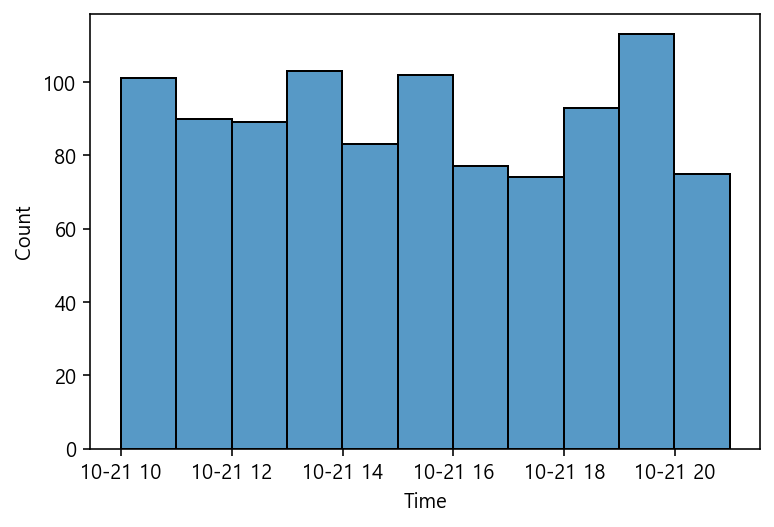

In [23]:
# 시간대별 총구매건수  
sns.histplot(cdt['Time'])

#아침식사 후, 점심식사 후, 낮잠 후, 퇴근 시간 후에 이용객이 많음을 볼 수 있다. 